# 2.Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [3]:
df = pd.read_csv("data.csv")

## 2.3 data preparation

MSRP is Manufacturer's Suggested Retail Price

In [4]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Distribution of price

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

LONG TAIL DISTRIBUTION (It's will confuse the model)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

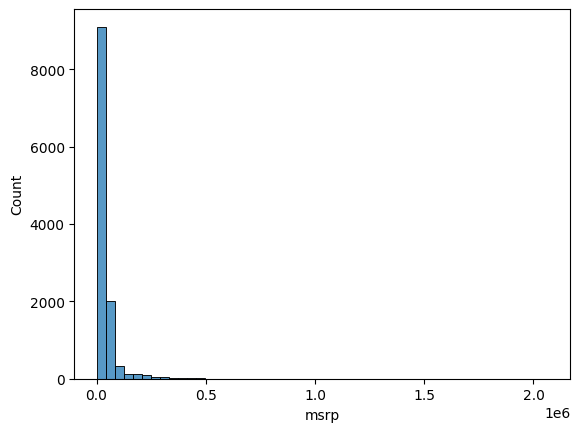

In [12]:
sns.histplot(df.msrp , bins = 50)

Zoom-in in most frequency

mean: 30476.444395175593
mode: 2000
median: 29095.0


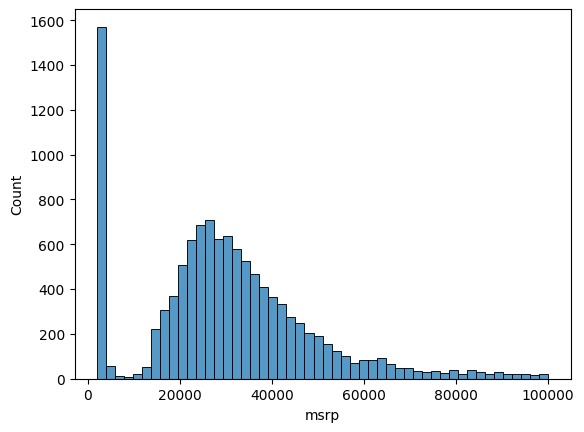

In [13]:
filter = df.msrp[df.msrp < 100000]
sns.histplot(filter, bins = 50)
print("mean:" ,filter.mean())
print("mode:" ,filter.mode()[0])
print("median:" ,filter.median())

for the long tail distribution I will take a log with it.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

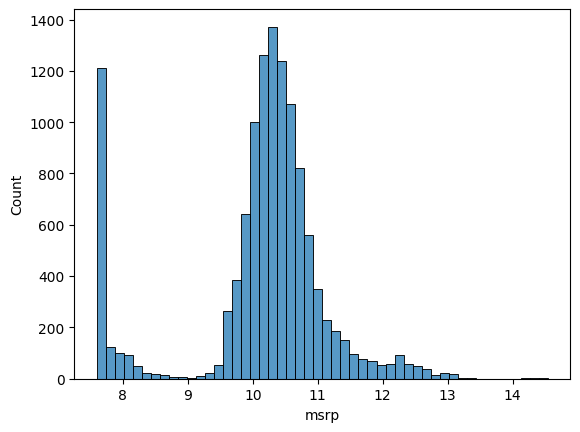

In [14]:
prince_log = np.log1p(df.msrp)
sns.histplot(prince_log , bins = 50)

Missing Values ( Should haddle before train the model )

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework
![](./photo/Setting%20up%20the%20validation%20framework.JPG)

In [16]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n_val , n_test , n_train

(2382, 2382, 7150)

Fold the data but can't use this one because It is not shuffle. 
It will have one same data at train so, 
We need to shuffle it before train the model.

In [18]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(2)
np.random.shuffle(idx)

In [21]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [22]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [23]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [24]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

## 2.5 Linear Regression
![](./photo/Linear%20Regression1.JPG)

In [25]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [26]:
xi = [453 , 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.0002]

$\hat{Y} = \hat{W}_{0} + \sum \limits_{j=0} ^{n-1} \hat{W}_{j} X_{ij}$

In [27]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [28]:
linear_regression(xi)

12.1572

In [29]:
# Don't forget for get log back and -1 because add log1p before
np.expm1(12.1572)

190459.4803887146

In [30]:
np.log1p(190459.4803887146)

12.1572

## 2.6 Linear regression vector form
![](./photo/vector%20form.JPG)

In [31]:
def dot(xi,w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [32]:
def linear_regression(xi):
    return w0 + dot(xi,w)

![](./photo/vector%20form2.JPG)

It can reduced the form of eqation

In [33]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.0002]

In [34]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [35]:
linear_regression(xi)

12.1572

In [36]:
xi = [328 , 17, 190]
w0 = 7
w = [0.01, 0.04, 0.0002]
w_new = [w0] + w

In [37]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 24, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 2031],
       [   1,  453,   11,   86]])

In [38]:
def linear_regression(X):
    return X.dot(w_new)

In [39]:
linear_regression(X)

array([ 9.717 ,  9.6862, 11.9872])

## 2.7 Training a linear regression model
How to find the W

${w} = ({X} ^{T} {X})^{-1} {X} ^ {T}{y}$

In [40]:
X = [
    [148, 24, 1385],
     [132, 24, 2031],
     [453, 11, 86],
     [158, 24, 185],
     [172, 25,201],
     [413, 11, 86],
     [38, 54, 185],
     [142, 25, 431],
     [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   24, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [41]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [179]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
train_linear_regression(X,y)

(30338.235198357772, array([ -23.24508418, -264.48613455,   -2.44929629]))

## 2.8 Car price baseline model

In [44]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [45]:
base = ['engine_hp','engine_cylinders','highway_mpg',
        'city_mpg','popularity']

X_train = df_train[base].fillna(0).values
W0 , w = train_linear_regression(X_train,y_train)
y_pred = W0 + X_train.dot(w)

In [46]:
w0

7

In [47]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<AxesSubplot:ylabel='Count'>

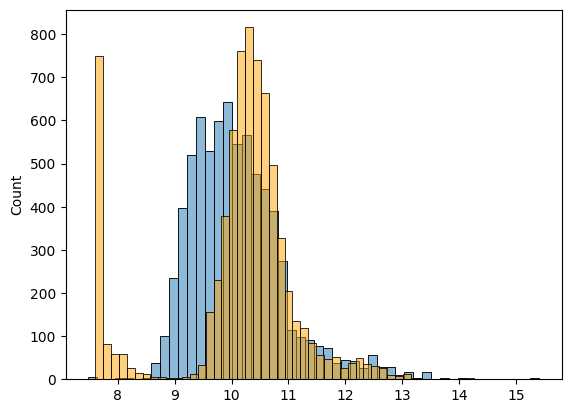

In [48]:
sns.histplot(y_pred, alpha = 0.5, bins=50)
sns.histplot(y_train, alpha = 0.5, bins=50, color = 'orange')

## 2.9 RMSE

$\sqrt{{1/n}    \sum_{i} ^ n ({g(Xi) - yi}) ^ {2}}$

In [49]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [50]:
rmse(y_train,y_pred)

0.7554192603920132

## 2.10 Validating the model

In [51]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [52]:
# Training part
X_train = prepare_X(df_train)
W0 , w = train_linear_regression(X_train,y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred_val = W0 + X_val.dot(w)

rmse(y_val,y_pred_val)

0.7616530991301603

## 2.11 Simple feature engineering

In [53]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [54]:
# Training part
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train,y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5172055461058329

<AxesSubplot:ylabel='Count'>

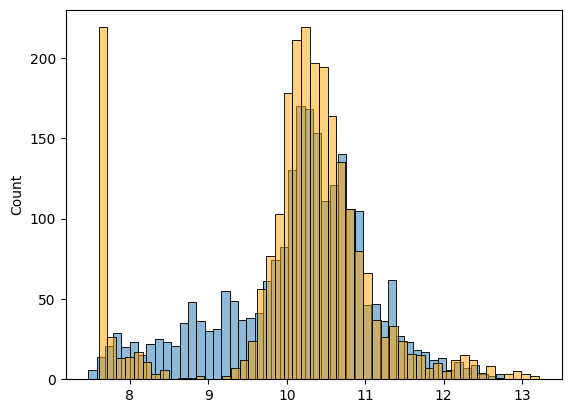

In [55]:
sns.histplot(y_pred, alpha = 0.5, bins=50)
sns.histplot(y_val, alpha = 0.5, bins=50, color = 'orange')

## 2.12 Categorical variables

In [56]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age'] 

    for v in [2, 3, 4]:
        df['number_of_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('number_of_%s' % v)
    
    
    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [57]:
# Training part
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train,y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5157995641502906

In [58]:
makes = list(df.make.value_counts().head().index)

In [59]:
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [60]:
def prepare_X(df):
    df = df.copy()

    features = base + ['age']
    df['age'] = 2017 - df.year
     

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['makes_%s' % v] = (df.make == v).astype('int')
        features.append('makes_%s' % v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [61]:
# Training part
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train,y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5076038849556838

In [62]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [176]:
categories_columns = [
    'make', 'model' ,'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category','vehicle_size', 'vehicle_style']

categories = {}

for c in categories_columns:
    categories[c] = list(df_train[c].value_counts().head().index)

In [177]:
def prepare_X(df):
    df = df.copy()

    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c , values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [181]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

679.3799522646844

In [70]:
w0, w

(1.03521330256475e+17,
 array([ 7.93775741e-01,  1.53000963e+02,  3.45853592e+01,  4.76839956e+01,
         5.13281179e-03,  1.41570332e+01,  2.99396331e+04,  3.00720252e+04,
         2.99507196e+04, -5.15275009e+01,  1.24726046e+01,  1.47724565e+02,
         5.00390429e+02, -1.08180981e+00, -1.94559257e+02, -5.79472504e+02,
        -2.63465951e+02, -2.26779139e+02, -4.41335434e+03,  2.47598039e+02,
         1.08068338e+02,  2.10153025e+02,  4.00219200e+02, -6.64974321e+02,
        -6.61902260e+16, -6.61902260e+16, -6.61902260e+16, -6.61902260e+16,
        -6.61902260e+16, -3.73311042e+16, -3.73311042e+16, -3.73311042e+16,
        -3.73311042e+16, -4.31172116e+01, -1.64342868e+01, -3.93712687e+00,
        -2.20156228e+00, -3.64877989e+01,  5.30391231e+01,  2.98613373e+01,
         7.89977494e+01, -9.63971162e-02, -1.65377271e-02,  1.65381720e-01,
         3.31158372e-01, -2.13380372e-01]))

## 2.13 Regilarization

In [189]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [190]:
y = [1, 2, 3, 1, 2, 3,]

In [191]:
XTX = X.T.dot(X)

In [192]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [193]:
XTX_inv = np.linalg.inv(XTX)

In [194]:
list(XTX_inv.dot(X.T).dot(y))

[0.27377657778561115, -4410930.9921875, 4410931.09765625]

In [195]:
XTX =[
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]

XTX = np.array(XTX)

if the matrix has a duplicate column it will error when try to inverse $({X^{T}X})$

In [196]:
try :
    np.linalg.inv(XTX)
except Exception as e: 
    print(e)

Singular matrix


So, It needs to be added small value to matrix

In [197]:
XTX = XTX + 0.01 * np.eye(3)
XTX

array([[1.01, 2.  , 2.  ],
       [2.  , 1.01, 1.  ],
       [2.  , 1.  , 1.01]])

In [198]:
np.linalg.inv(XTX)

array([[ -0.33668906,   0.33501399,   0.33501399],
       [  0.33501399,  49.91540897, -50.08459103],
       [  0.33501399, -50.08459103,  49.91540897]])

In [199]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    if r != 0 :
        XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [219]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4516923039094092

## 2.14 Tuning the model

In [222]:
for r in [0.0, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r ,w0 ,score)

0.0 1.03521330256475e+17 679.3799522646844
1e-08 19211976.37615648 0.4516574730724169
1e-07 31433.718421163747 0.45169158738822973
1e-06 -1038.5706020281991 0.4516923054027638
1e-05 24.272123605831425 0.4516918385415347
0.0001 6.406099244664315 0.45169191891128413
0.001 6.316893579076271 0.4516923039094092
0.1 6.220624886688105 0.4517370453151275
1 5.659773364838326 0.4523259466785113
10 4.294591051391993 0.4653582071674867


In [224]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4516923039094092

## 2.15 Using the model
![](./photo/Using%20the%20model.JPG)

In [242]:
# combine train and val on x
df_full_train = pd.concat([df_train , df_val]).reset_index(drop = True)
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [241]:
# combine train and val on y
y_full_train = np.concatenate([y_train,y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [243]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.44763897311789846

### When deploy the model

when model is deployed. It will has a request with JSON file

![](./photo/deploy.JPG)

![](./photo/deploy2.JPG)

In [247]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [252]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [267]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.6730775064339

In [268]:
np.expm1(y_pred)

43176.616631903846

In [269]:
np.expm1(y_test[20])

35000.00000000001

## 2.16 Next steps
 - We included only 5 top features. What happens if we include 10?

In [273]:
categories_columns = [
    'make', 'model' ,'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category','vehicle_size', 'vehicle_style']

categories = {}

for c in categories_columns:
    categories[c] = list(df_train[c].value_counts().head(10).index)

In [294]:
# try it without reg
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

230.705907026467

In [296]:
r_final = 0
score_list = []
for r in [0.0, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    if score_list == []:
        score_list.append(score)
    else :
        if score < score_list:
            r_final = r
    print(r ,w0 ,score)

print(r_final)

0.0 -284418810471476.75 230.705907026467
1e-08 -2793153.3546060952 0.4378527973121586
1e-07 -33889.16249253531 0.43766053445868075
1e-06 906.4035759252014 0.43766946546291385
1e-05 15.341117961109509 0.43766987839555194
0.0001 6.201846206312673 0.4376691997783449
0.001 6.2384814575200425 0.43766437245319534
0.1 5.949874845936743 0.437555437135104
1 5.329377793971271 0.4382654774616747
10 4.195496167436511 0.4510104246275908
10


In [297]:
r = r_final

In [298]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4419426133705421

In [299]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.646996295987151

In [300]:
np.expm1(y_pred)

42065.050628654295

In [301]:
np.expm1(y_test[20])

35000.00000000001

Comparing with 5 columns on feature engineering.

- On test model10(top 10 catagories columns) ${0.441}$ have rmse less than model5(top 5 catagories columns) ${0.447}$
  
  but It's not much that have significant values. So, It's same

## 2.17 Summary
   - EDA - looking at data, finding missing values

   - Target variable distribution - long tail => bell shaped curve

  -  Validation framework: train/val/test split (helped us detect problems)
   - Normal equation - not magic, but math

   - Implemented it with numpy

   - RMSE to validate our model

  -  Feature engineering: age, categorical features

  -  Regularization to fight numerical instability